In [2]:
!pip install --upgrade tf-keras-vis tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1


In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))

1 GPUs


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img

model = Model(weights="imagenet", include_top=True)
model.summary()

553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [7]:
!wget https://github.com/keisen/tf-keras-vis/raw/master/docs/examples/images/goldfish.jpg
!wget https://github.com/keisen/tf-keras-vis/raw/master/docs/examples/images/bear.jpg
!wget https://github.com/keisen/tf-keras-vis/raw/master/docs/examples/images/soldiers.jpg

--2024-05-21 19:08:18--  https://github.com/keisen/tf-keras-vis/raw/master/docs/examples/images/goldfish.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/keisen/tf-keras-vis/master/docs/examples/images/goldfish.jpg [following]
--2024-05-21 19:08:18--  https://raw.githubusercontent.com/keisen/tf-keras-vis/master/docs/examples/images/goldfish.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8833 (8.6K) [image/jpeg]
Saving to: ‘goldfish.jpg’

goldfish.jpg        100%[===================>]   8.63K  --.-KB/s    in 0s      

2024-05-21 19:08:19 (85.5 MB/s) - ‘goldfish.jpg’ saved [8833/8833]

--2

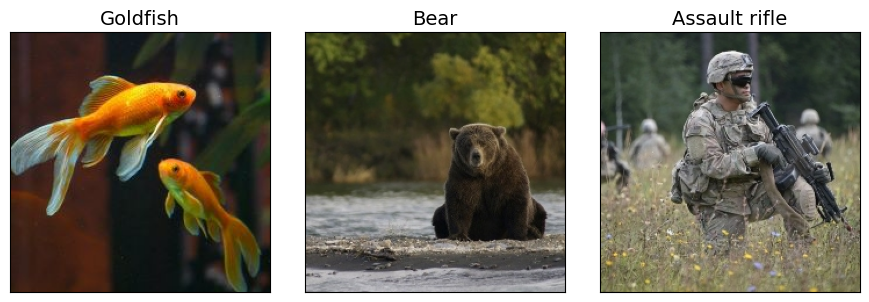

In [11]:
from tensorflow.keras.preprocessing.image import load_img

image_titles = ["Goldfish", "Bear", "Assault rifle"]

img1 = load_img("goldfish.jpg", target_size=(224, 224))
img2 = load_img("bear.jpg", target_size=(224, 224))
img3 = load_img("soldiers.jpg", target_size=(224, 224))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

X = preprocess_input(images)

subplot_args = {"nrows": 1, "ncols": 3, "figsize": (9, 3),
                "subplot_kw": {"xticks": [], "yticks": []}}

f, ax = plt.subplots(**subplot_args)

for i, title in enumerate(image_titles):
  ax[i].set_title(title, fontsize=14)
  ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

In [12]:
def loss(output):
  return (output[0][1], output[1][294], output[2][413])

In [13]:
def model_modifier(m):
  m.layers[-1].activation = tf.keras.activations.linear
  return m

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


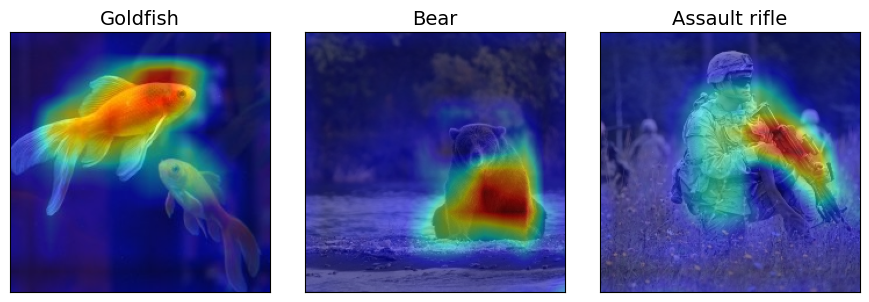

In [18]:
%time
from tensorflow.keras import backend as K
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

gradcam = Gradcam(model,
                  model_modifier=model_modifier,
                  clone=False)

cam = gradcam(loss,
              X,
              penultimate_layer=-1,)
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
  heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
  ax[i].set_title(title, fontsize=14)
  ax[i].imshow(images[i])
  ax[i].imshow(heatmap, cmap="jet", alpha=0.5)
plt.tight_layout()
plt.show()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


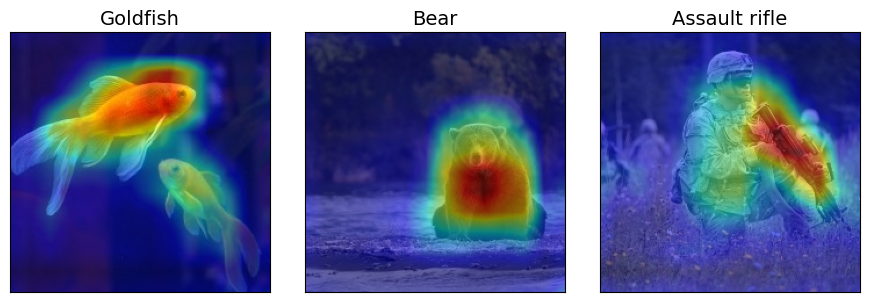

In [19]:
%time

from tf_keras_vis.gradcam import GradcamPlusPlus

gradcam = GradcamPlusPlus(model,
                  model_modifier=model_modifier,
                  clone=False)

cam = gradcam(loss,
              X,
              penultimate_layer=-1,)
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
  heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
  ax[i].set_title(title, fontsize=14)
  ax[i].imshow(images[i])
  ax[i].imshow(heatmap, cmap="jet", alpha=0.5)
plt.tight_layout()
plt.show()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
48/48 [==============================] - 12s 108ms/step


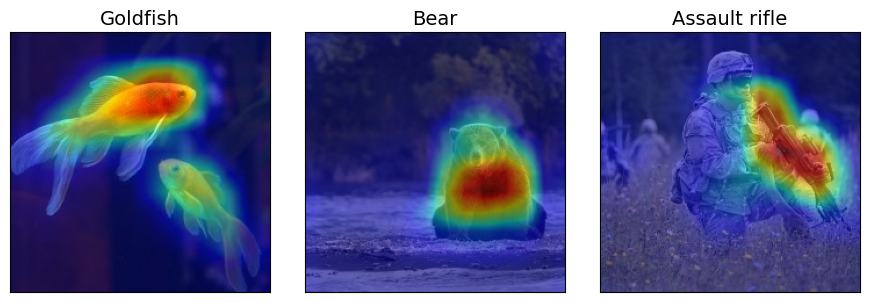

In [21]:
%time

from tf_keras_vis.scorecam import ScoreCAM

gradcam = ScoreCAM(model,
                  model_modifier=model_modifier,
                  clone=False)

cam = gradcam(loss,
              X,
              penultimate_layer=-1,)
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
  heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
  ax[i].set_title(title, fontsize=14)
  ax[i].imshow(images[i])
  ax[i].imshow(heatmap, cmap="jet", alpha=0.5)
plt.tight_layout()
plt.show()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
3/3 [==============================] - 5s 3s/step


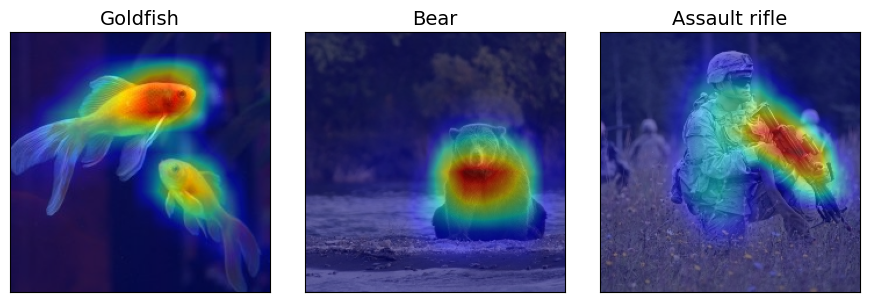

In [22]:
%time

gradcam = ScoreCAM(model,
                  model_modifier=model_modifier,
                  clone=False)

cam = gradcam(loss,
              X,
              penultimate_layer=-1,
              max_N=10)
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
  heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
  ax[i].set_title(title, fontsize=14)
  ax[i].imshow(images[i])
  ax[i].imshow(heatmap, cmap="jet", alpha=0.5)
plt.tight_layout()
plt.show()